In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import matplotlib.pyplot as plot
import seaborn
from sklearn.metrics import roc_auc_score
#nltk.download('stopwords')

In [3]:
stiri_adevarate = pd.read_csv("../input/fake-and-real-news-dataset/True.csv")
stiri_false = pd.read_csv("../input/fake-and-real-news-dataset/Fake.csv")

In [4]:
stiri_adevarate.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<AxesSubplot:xlabel='subject', ylabel='count'>

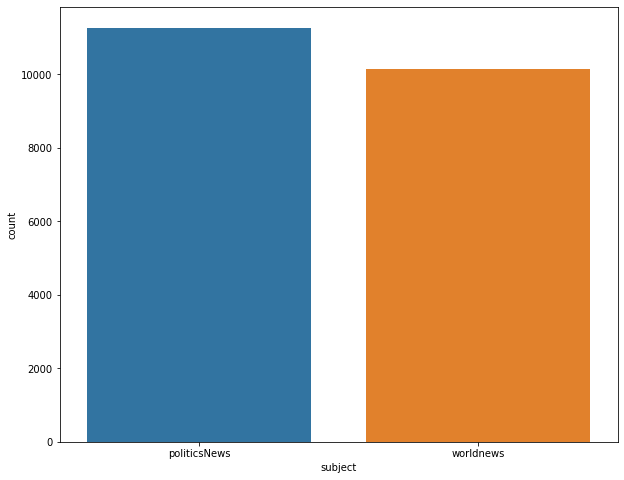

In [5]:
plot.figure(figsize=(10,8))
seaborn.countplot(data = stiri_adevarate, x='subject')

<AxesSubplot:xlabel='subject', ylabel='count'>

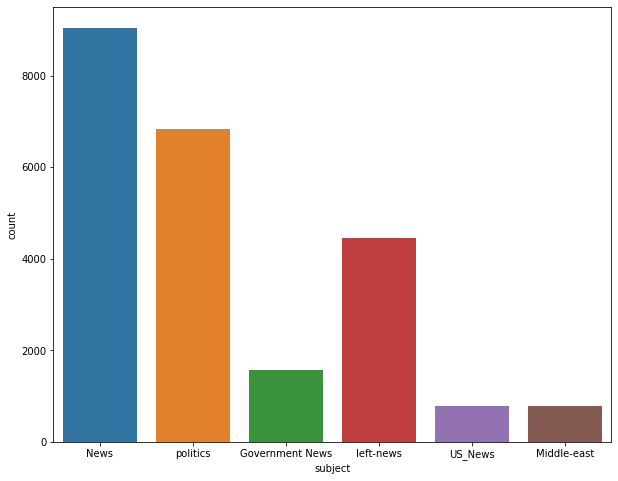

In [6]:
plot.figure(figsize=(10,8))
seaborn.countplot(data = stiri_false, x='subject')

<AxesSubplot:xlabel='subject', ylabel='count'>

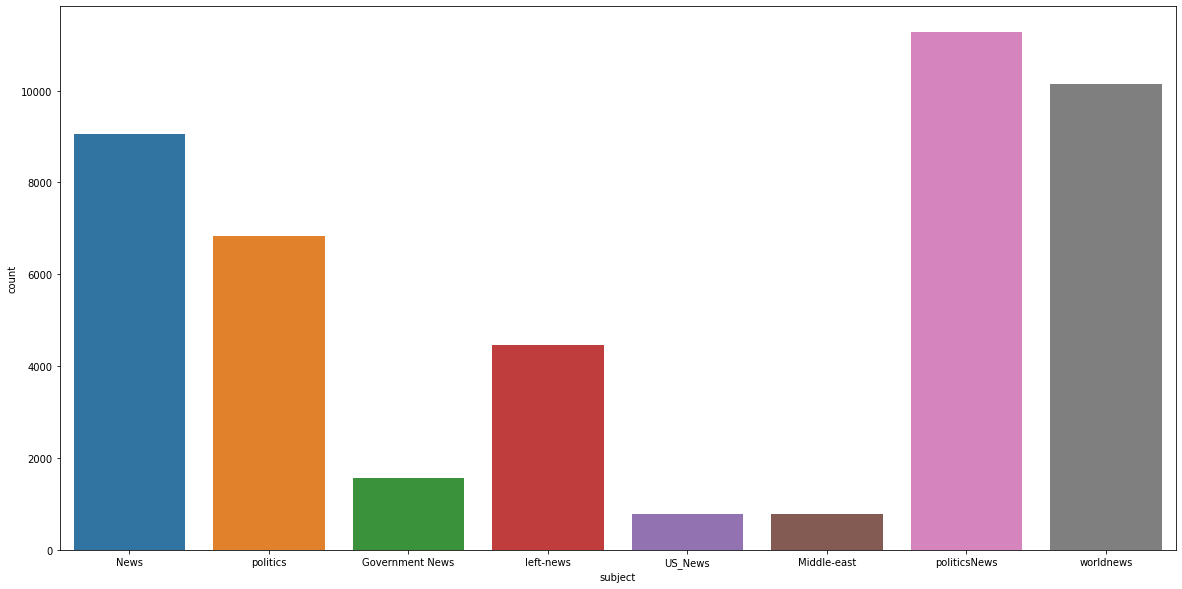

In [7]:
plot.figure(figsize=(20, 10))
seaborn.countplot(x="subject", data = pd.concat([stiri_false, stiri_adevarate]))

In [8]:
stiri_adevarate["class"] = 1
stiri_false["class"] = 0
dataframe = pd.concat([stiri_false, stiri_adevarate])
dataframe['text'] = dataframe['text'] + " " + dataframe['title']
del dataframe['title']
del dataframe['subject']
del dataframe['date']

In [9]:
dataframe.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
trump = dataframe[dataframe['text'].str.contains('Donald Trump')]
trump.count()['text']

17800

In [11]:
trump_adev = stiri_adevarate[stiri_adevarate['text'].str.contains('Donald Trump')]
trump_adev.count()['text']

9172

In [12]:
trump_fals = stiri_false[stiri_false['text'].str.contains('Donald Trump')]
trump_fals.count()['text']

8554

In [13]:
nk = dataframe[dataframe['text'].str.contains('North Korea')]
nk.count()['text']

1844

In [14]:
nk_adev = stiri_adevarate[stiri_adevarate['text'].str.contains('North Korea')]
nk_adev.count()['text']

1515

In [15]:
nk_fals = stiri_false[stiri_false['text'].str.contains('North Korea')]
nk_fals.count()['text']

324

<AxesSubplot:xlabel='class', ylabel='count'>

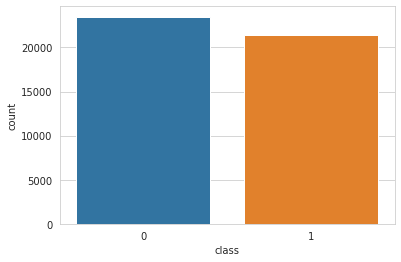

In [16]:
seaborn.set_style("whitegrid")
seaborn.countplot(x="class", data = dataframe)

In [17]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

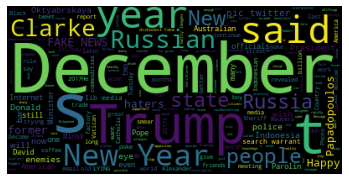

In [18]:
cloud_text = dataframe["text"].values
wordcloud = WordCloud().generate(str(cloud_text))
plot.imshow(wordcloud)
plot.axis("off")
plot.show()

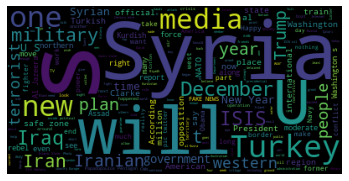

In [19]:
cloud_text_fake = (stiri_false["text"] + " " + stiri_false["title"]).values
wordcloud = WordCloud().generate(str(cloud_text_fake))
plot.imshow(wordcloud)
plot.axis("off")
plot.show()

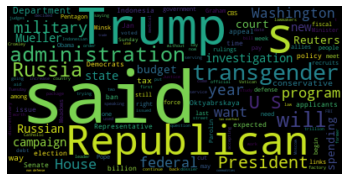

In [20]:
cloud_text_true = (stiri_adevarate["text"] + " " + stiri_adevarate["title"]).values
wordcloud = WordCloud().generate(str(cloud_text_true))
plot.imshow(wordcloud, interpolation='bilinear')
plot.axis("off")
plot.show()

In [21]:
the = dataframe[dataframe['text'].str.contains('the')]
the.count()['text']

43683

In [22]:
type(dataframe['text'])

pandas.core.series.Series

In [23]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
stopW = stopwords.words('english')
custom_stop_words = text.ENGLISH_STOP_WORDS.union(stopW)

In [25]:
tfidvectorizer = TfidfVectorizer(max_df=0.8, stop_words = custom_stop_words, max_features=10000, ngram_range=(1,2))

In [26]:
del stopW
del custom_stop_words
del stiri_false
del stiri_adevarate

In [27]:
caracteristici = dataframe['text'] # x caracteristica
predictii = dataframe['class'] # y predictie

In [28]:
dataframe.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(caracteristici, predictii, test_size=0.20, random_state=1)

In [30]:
tfidvectorizer.fit(X_train)

TfidfVectorizer(max_df=0.8, max_features=10000, ngram_range=(1, 2),
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'ain',
                                      'all', 'almost', 'alone', 'along',
                                      'already', 'also', 'although', 'always',
                                      'am', 'among', 'amongst', 'amoungst',
                                      'amount', 'an', 'and', 'another', 'any',
                                      'anyhow', 'anyone', 'anything', 'anyway', ...}))

In [31]:
X_train

19625    Nothing says  Thanksgiving  or  family  like a...
21965    What this story shows is that while there are ...
12561    CAIRO (Reuters) - Russian President Vladimir P...
4137     WASHINGTON (Reuters) - President Donald Trump ...
1608     WASHINGTON (Reuters) - U.S. Senator John McCai...
                               ...                        
20242    GUATEMALA CITY (Reuters) - Guatemala s federal...
9030     WASHINGTON (Reuters) - U.S. House of Represent...
5192     While in Virginia, GOP presidential nominee Do...
12172    Judge Jeanine Pirro has had it with the left a...
9522     WASHINGTON (Reuters) - A congressional committ...
Name: text, Length: 35918, dtype: object

In [32]:
X_train = tfidvectorizer.transform(X_train).toarray()
X_test = tfidvectorizer.transform(X_test).toarray()


In [33]:
X_test.shape

(8980, 10000)

In [34]:
type(X_train)

numpy.ndarray

In [35]:
rows_X_train, cols_X_train = X_train.shape
X_train.shape


(35918, 10000)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
model = Sequential()
model.add(Dense(units = 200 , activation = 'relu' , input_shape = (rows_X_train, cols_X_train)))
model.add(Dense(units = 150 , activation = 'relu'))
model.add(Dense(units = 100 , activation = 'relu'))
model.add(Dense(units = 30 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

2022-06-16 08:35:25.448211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 08:35:25.617417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 08:35:25.618262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 08:35:25.619628: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [37]:

model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [38]:
istoric = model.fit(x=X_train, y=y_train, epochs=26, verbose = True, validation_data = (X_test,y_test))

2022-06-16 08:35:29.795781: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1436720000 exceeds 10% of free system memory.
2022-06-16 08:35:31.449054: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1436720000 exceeds 10% of free system memory.
2022-06-16 08:35:32.586451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/26
1123/1123 [==============================] - 7s 5ms/step - loss: 0.0565 - accuracy: 0.9803 - val_loss: 0.0269 - val_accuracy: 0.9905
Epoch 2/26
1123/1123 [==============================] - 5s 5ms/step - loss: 0.0076 - accuracy: 0.9975 - val_loss: 0.0310 - val_accuracy: 0.9918
Epoch 3/26
1123/1123 [==============================] - 4s 4ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0291 - val_accuracy: 0.9932
Epoch 4/26
1123/1123 [==============================] - 5s 4ms/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.0380 - val_accuracy: 0.9924
Epoch 5/26
1123/1123 [==============================] - 4s 4ms/step - loss: 8.0937e-04 - accuracy: 0.9998 - val_loss: 0.0422 - val_accuracy: 0.9938
Epoch 6/26
1123/1123 [==============================] - 4s 4ms/step - loss: 8.1469e-04 - accuracy: 0.9998 - val_loss: 0.0385 - val_accuracy: 0.9924
Epoch 7/26
1123/1123 [==============================] - 5s 4ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0531 - val_a

In [39]:
print(istoric.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [40]:
print(istoric.history['accuracy'])

[0.9802884459495544, 0.9974942803382874, 0.9984687566757202, 0.9990255832672119, 0.9998050928115845, 0.9998329281806946, 0.9994710087776184, 0.999359667301178, 0.9996380805969238, 0.9999721646308899, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35918, 200)        2000200   
_________________________________________________________________
dense_1 (Dense)              (None, 35918, 150)        30150     
_________________________________________________________________
dense_2 (Dense)              (None, 35918, 100)        15100     
_________________________________________________________________
dense_3 (Dense)              (None, 35918, 30)         3030      
_________________________________________________________________
dense_4 (Dense)              (None, 35918, 1)          31        
Total params: 2,048,511
Trainable params: 2,048,511
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.evaluate(X_train,y_train)[1]*100

2022-06-16 08:37:41.355170: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1436720000 exceeds 10% of free system memory.
2022-06-16 08:37:42.907348: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1436720000 exceeds 10% of free system memory.


1123/1123 [==============================] - 3s 2ms/step - loss: 2.2235e-10 - accuracy: 1.0000


100.0

In [43]:
predictii_model = (model.predict(X_test) > 0.5).astype("int32")


In [44]:
predictii_model[:5]

array([[0],
       [1],
       [0],
       [0],
       [1]], dtype=int32)

In [45]:
print('acuratete: ', roc_auc_score(y_test, predictii_model))

acuratete:  0.9937315747825051


In [46]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predictii_model)
cm



array([[4644,   38],
       [  19, 4279]])

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
mnb = MultinomialNB(alpha=0.1) 

In [49]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [50]:
y_prezis = mnb.predict(X_test)

In [51]:
y_prezis[:5]

array([0, 1, 0, 0, 1])

In [52]:
print('acuratete: ', roc_auc_score(y_test, y_prezis))

acuratete:  0.9549191790028205


In [53]:
from sklearn.metrics import classification_report

In [54]:
print(confusion_matrix(y_test, y_prezis, labels=[0, 1]))

[[4481  201]
 [ 203 4095]]


In [55]:
cm = confusion_matrix(y_test, y_prezis , labels=[0, 1])

<AxesSubplot:>

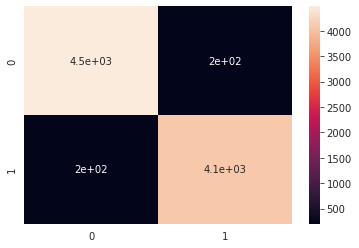

In [56]:
ax= plot.subplot()
seaborn.heatmap(cm, annot=True, ax= ax)